# 10.004 Math II 1D Project




## Dataset Processing and Data Visulization for Math Modeling



In [86]:
import csv
import pandas as pd
import numpy as np

In [87]:
df1 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

towns = [] #len = 26
for town in df1['town']:
    if town not in towns:
        towns.append(town)
        
ft = {}
'''
{'3 ROOM': 10020, '4 ROOM': 15189, '5 ROOM': 8734, '2 ROOM': 347, 'EXECUTIVE': 2839, '1 ROOM': 13, 'MULTI-GENERATION': 4}
'''
for flat_type in df1['flat_type']:
    if flat_type not in ft.keys():
        ft[flat_type] = 0
    else:
        ft[flat_type] += 1

types = [key for key in ft.keys()]

print(towns)
print(types)

['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH', 'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST', 'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL', 'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN']
['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM', 'MULTI-GENERATION']


In [88]:
#newdf = df1[(df1['town']=='ANG MO KIO') & (df1['flat_type']=='3 ROOM')]
#prices = [n for n in newdf['resale_price']]

price_distro = {}

def find_price(town_name):
    global df1,towns,typs,price_distro
    
    dist = {}
    
    for ty in types:
        data = df1[(df1['town']==town_name) & (df1['flat_type']==ty)]
        prices = [n for n in data['resale_price']]
        if len(prices) != 0:
            avg = sum(prices)/len(prices)
            dist[ty] = round(avg, 2)
        else:
            dist[ty] = 0
            
        price_distro[town_name] = dist
        
    return None

for town in towns:
    find_price(town)

print(price_distro)

{'ANG MO KIO': {'2 ROOM': 219106.38, '3 ROOM': 299110.63, '4 ROOM': 481236.12, '5 ROOM': 693175.27, 'EXECUTIVE': 819809.0, '1 ROOM': 0, 'MULTI-GENERATION': 0}, 'BEDOK': {'2 ROOM': 222146.34, '3 ROOM': 296903.88, '4 ROOM': 434059.95, '5 ROOM': 580112.9, 'EXECUTIVE': 717903.72, '1 ROOM': 0, 'MULTI-GENERATION': 0}, 'BISHAN': {'2 ROOM': 0, '3 ROOM': 363726.25, '4 ROOM': 565423.51, '5 ROOM': 780297.24, 'EXECUTIVE': 900853.84, '1 ROOM': 0, 'MULTI-GENERATION': 893333.33}, 'BUKIT BATOK': {'2 ROOM': 0, '3 ROOM': 264861.27, '4 ROOM': 381847.0, '5 ROOM': 522451.83, 'EXECUTIVE': 621787.52, '1 ROOM': 0, 'MULTI-GENERATION': 0}, 'BUKIT MERAH': {'2 ROOM': 249093.65, '3 ROOM': 382776.91, '4 ROOM': 649906.89, '5 ROOM': 769159.55, 'EXECUTIVE': 0, '1 ROOM': 186938.14, 'MULTI-GENERATION': 0}, 'BUKIT PANJANG': {'2 ROOM': 232042.29, '3 ROOM': 287491.0, '4 ROOM': 382898.99, '5 ROOM': 481034.3, 'EXECUTIVE': 593185.15, '1 ROOM': 0, 'MULTI-GENERATION': 0}, 'BUKIT TIMAH': {'2 ROOM': 0, '3 ROOM': 416538.46, '4 ROO

In [89]:
prices = {}

for town in price_distro.keys():
    s = 0
    for ty,pr in price_distro[town].items():
        if ty == '3 ROOM':
            s += pr/3
        elif ty == '4 ROOM':
            s += pr/4
        elif ty == '5 ROOM':
            s += pr/5
        elif ty == '2 ROOM':
            s += pr/2
        else:
            s += pr/10
    prices[town] = s
    
print(prices)
print(len(prices))

{'ANG MO KIO': 550181.7173333333, 'BEDOK': 506369.0695, 'BISHAN': 598076.1258333332, 'BUKIT BATOK': 350417.958, 'BUKIT MERAH': 587141.5748333334, 'BUKIT PANJANG': 463101.60083333333, 'BUKIT TIMAH': 557957.8893333334, 'CENTRAL AREA': 637365.2778333334, 'CHOA CHU KANG': 430169.472, 'CLEMENTI': 623972.6781666668, 'GEYLANG': 539237.775, 'HOUGANG': 480396.57050000003, 'JURONG EAST': 490474.07450000005, 'JURONG WEST': 430642.01283333334, 'KALLANG/WHAMPOA': 595854.4048333333, 'MARINE PARADE': 528722.7583333333, 'PASIR RIS': 358039.62700000004, 'PUNGGOL': 510116.43816666666, 'QUEENSTOWN': 687146.0785, 'SEMBAWANG': 420567.44649999996, 'SENGKANG': 488778.0993333333, 'SERANGOON': 510418.9118333333, 'TAMPINES': 614978.2714999999, 'TOA PAYOH': 586108.1366666667, 'WOODLANDS': 421938.10966666666, 'YISHUN': 519936.1855}
26


In [90]:
plab = {'ANG MO KIO': 7.35, 'BEDOK': 4.45, 'BISHAN': 8.54, 'GEYLANG': 4.85, 'HOUGANG': 2.71,  'KALLANG/WHAMPOA': 7.54, 'MARINE PARADE': 6.71, 'PASIR RIS': 4.20, 'PUNGGOL': 4.28, 'SENGKANG': 3.67, 'SERANGOON': 4.35, 'TAMPINES': 5.24, 'TOA PAYOH': 6.71}
tengah = {'BUKIT PANJANG': 7.28, 'CHOA CHU KANG': 4.35, 'CLEMENTI': 9.93, 'JURONG EAST': 7.44, 'JURONG WEST': 5.37}

In [91]:
import matplotlib.pyplot as plt

def plot(distance_dict,prices_dict):
    # To get the graph for changi airport first

    x = [town+' '+str(km) for town,km in distance_dict.items()] #convert dict to list
    x.sort(key = lambda x: float(x[-4:].strip()))               #sort according to distance
    print(x)
    x_ = [float(n[-4:].strip()) for n in x]
    print(x_)                                                   #x_ is the list of distance values
    y_towns = [town[:-4].strip() for town in x]
    y = [prices_dict[town] for town in y_towns]

    plt.figure(1, figsize=(12,12))

    graph = plt.plot(x_,y,'-o')
    plt.xticks(x_, x)
    
    plt.xticks(rotation=270)
    plt.show()

    return None



['HOUGANG 2.71', 'SENGKANG 3.67', 'PASIR RIS 4.2', 'PUNGGOL 4.28', 'SERANGOON 4.35', 'BEDOK 4.45', 'GEYLANG 4.85', 'TAMPINES 5.24', 'MARINE PARADE 6.71', 'TOA PAYOH 6.71', 'ANG MO KIO 7.35', 'KALLANG/WHAMPOA 7.54', 'BISHAN 8.54']
[2.71, 3.67, 4.2, 4.28, 4.35, 4.45, 4.85, 5.24, 6.71, 6.71, 7.35, 7.54, 8.54]


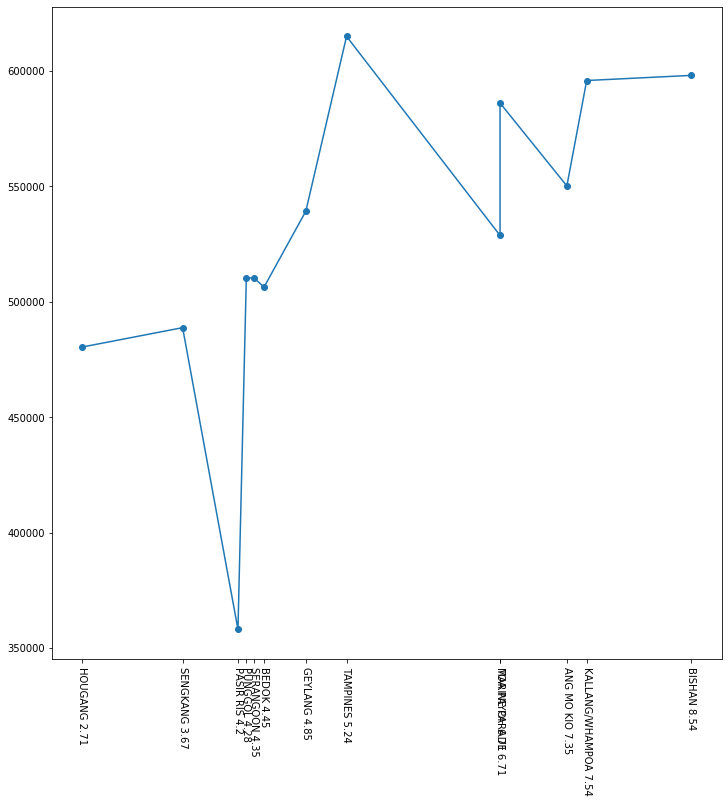

In [92]:
plot(plab,prices)

['CHOA CHU KANG 4.35', 'JURONG WEST 5.37', 'BUKIT PANJANG 7.28', 'JURONG EAST 7.44', 'CLEMENTI 9.93']
[4.35, 5.37, 7.28, 7.44, 9.93]


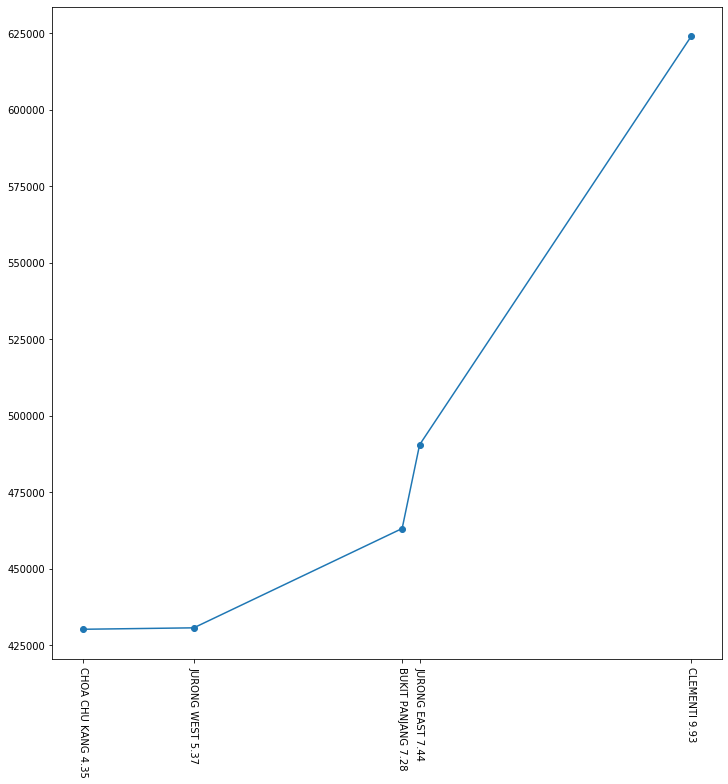

In [93]:
plot(tengah,prices)

In [94]:
from sklearn.linear_model import LinearRegression
import numpy as np

linear_regressor = LinearRegression()  # create object for the class

def regress(X,Y):
    
    
    
    plt.figure(1, figsize=(12,12))

    
    
    X_ = [float(n[-4:].strip()) for n in X]
    plt.scatter(X_,Y)
    
    X_ = np.array(X_)
    Y = np.array(Y)
    
    X_ = X_.reshape(-1, 1) 
    Y = Y.reshape(-1, 1)
    linear_regressor.fit(X_, Y)  # perform linear regression
    
    
    Y_pred = linear_regressor.predict(X_)  # make predictions
    figure = plt.plot(X_, Y_pred, color='red')
    plt.xticks(X_, X)
    
    plt.xticks(rotation=270)
    plt.show()
    
    return None



['HOUGANG 2.71', 'SENGKANG 3.67', 'PUNGGOL 4.28', 'SERANGOON 4.35', 'BEDOK 4.45', 'GEYLANG 4.85', 'MARINE PARADE 6.71', 'TOA PAYOH 6.71', 'ANG MO KIO 7.35', 'KALLANG/WHAMPOA 7.54', 'BISHAN 8.54'] [480396.57050000003, 488778.0993333333, 510116.43816666666, 510418.9118333333, 506369.0695, 539237.775, 528722.7583333333, 586108.1366666667, 550181.7173333333, 595854.4048333333, 598076.1258333332]


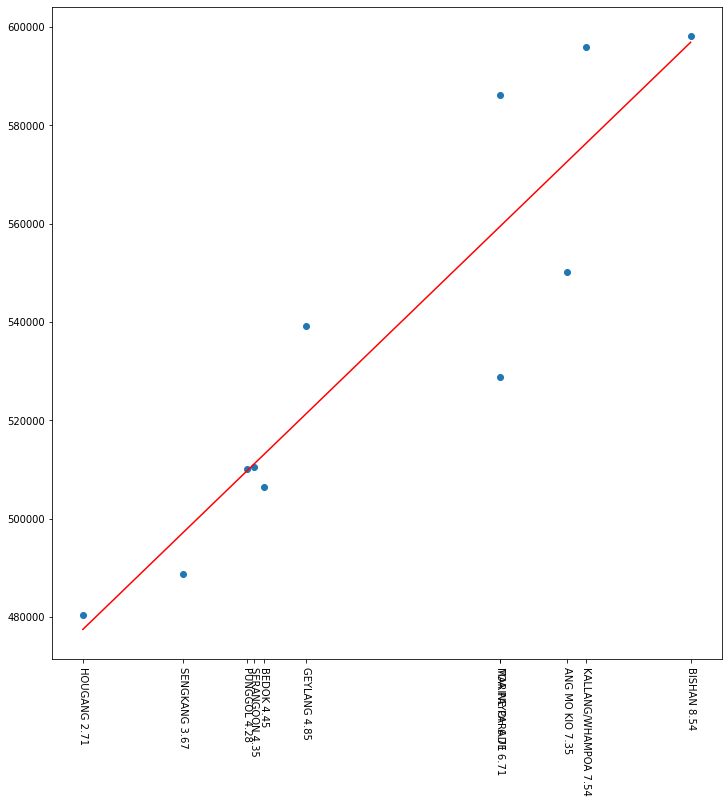

In [95]:
p = ['HOUGANG 2.71', 'SENGKANG 3.67', 'PUNGGOL 4.28', 'SERANGOON 4.35', 'BEDOK 4.45', 'GEYLANG 4.85', 'MARINE PARADE 6.71', 'TOA PAYOH 6.71', 'ANG MO KIO 7.35', 'KALLANG/WHAMPOA 7.54', 'BISHAN 8.54']
y_towns2 = [town[:-4].strip() for town in p]
y2 = [prices[town] for town in y_towns2]

print(p,y2)
regress(p,y2)


['CHOA CHU KANG', 'JURONG WEST', 'BUKIT PANJANG', 'JURONG EAST', 'CLEMENTI']
[430169.472, 430642.01283333334, 463101.60083333333, 490474.07450000005, 623972.6781666668]
['CHOA CHU KANG 4.35', 'JURONG WEST 5.37', 'BUKIT PANJANG 7.28', 'JURONG EAST 7.44', 'CLEMENTI 9.93'] [430169.472, 430642.01283333334, 463101.60083333333, 490474.07450000005, 623972.6781666668]


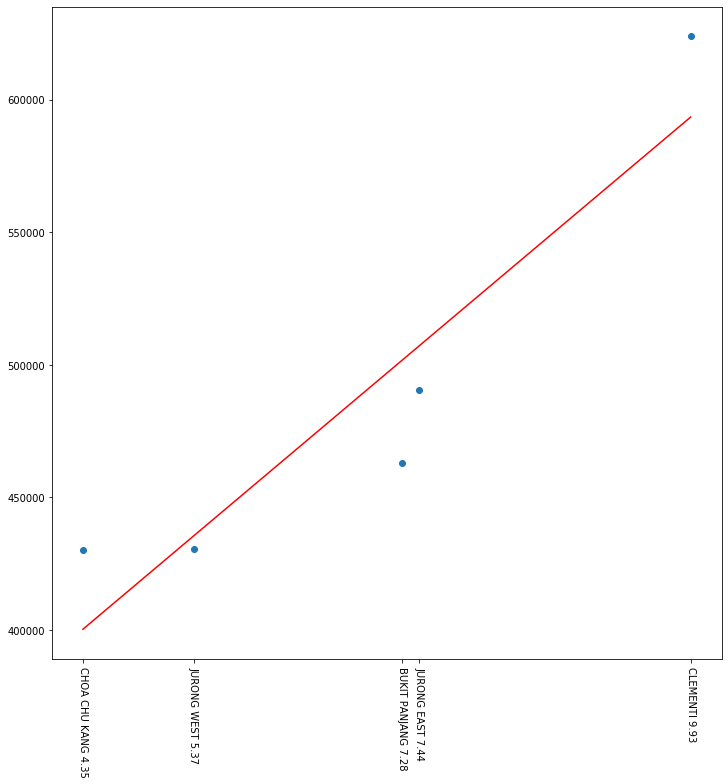

In [96]:
t = ['CHOA CHU KANG 4.35', 'JURONG WEST 5.37', 'BUKIT PANJANG 7.28', 'JURONG EAST 7.44', 'CLEMENTI 9.93']
y_towns3 = [town[:-4].strip() for town in t]
print(y_towns3)


y3 = [prices[town] for town in y_towns3]
print(y3)
print(t,y3)
regress(t,y3)

